# Decision Tree 

## 1. Classification Tree
> 한 번 분기때 마다 변수 영역을 두 개로 구분하며,  타겟변수(Y)가 "Categorical Variable(범주형)인 변수"
- 분류나무는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행
- 순도가 증가/불확실성이 감소하는 걸 두고 정보이론에서는 정보획득(information gain)이라고 함

In [1]:
import os
os.chdir(r'C:/Users/User/Desktop')
os.getcwd()

'C:\\Users\\User\\Desktop'

### 1.1 Dataset 정의 및 설명

In [2]:
import pandas as pd
import numpy as np

In [3]:
# data가 dict처럼 보이지만 dict는 아님 #
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
from IPython.display import Image

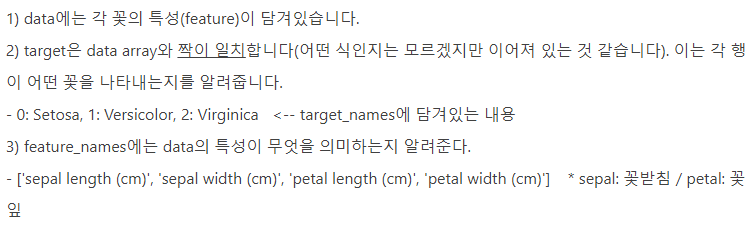

In [5]:
# iris 간단 설명 #
Image("img/iris.png",  width=750, height=750)

In [6]:
#import data
X = iris['data']
y = iris['target']
col_names = iris.feature_names
iris_df = pd.DataFrame(data=np.concatenate((X,y.reshape(-1,1)), axis=1), columns= ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'target'])

# target: 0,1,2 총 3개
print(np.unique(iris_df.target).astype('int'))
iris_df.head()

[0 1 2]


,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
#train test 분리
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:,:-1], iris_df.iloc[:,-1], test_size=0.2, random_state=0)
y_test.head()

114    2.0
62     1.0
33     0.0
107    2.0
7      0.0
Name: target, dtype: float64

### 1-2. modeling
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

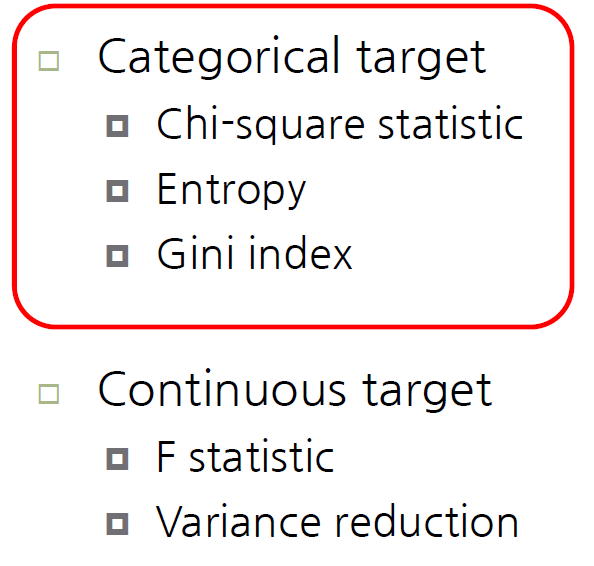

In [8]:
Image("img/split_criteria.png",  width=150, height=150)

### split criterion

- 분기기준(split criterion: chi2, mse,entropy, geni) -> chi2은 CHAID 패키지에서만 지원
- 일반적으로 classifier는 entropy, geni, regression은 mse를 사용

### Gini index Graph
> 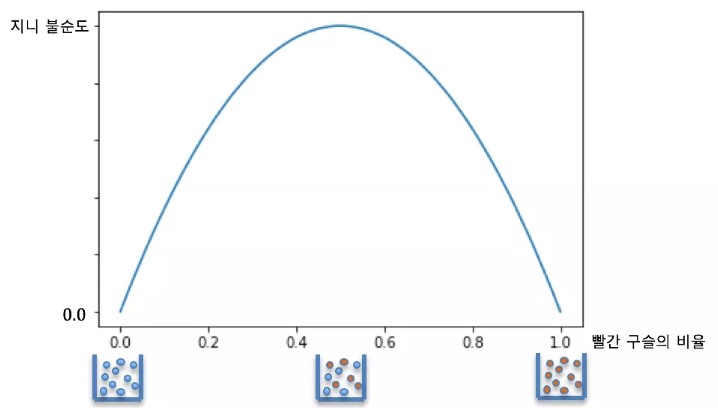

In [9]:
# split criterion이 gini일 때 #
from sklearn.tree import DecisionTreeClassifier

clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=0) 

clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
# y_pred_prob: 기존 class대로 class가 될 확률을 뱉어준 형태
y_pred_prob = clf_tree.predict_proba(X_test)
y_pred_prob

array([[0.        , 0.02439024, 0.97560976],
       [0.        , 0.9       , 0.1       ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02439024, 0.97560976],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02439024, 0.97560976],
       [1.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.9       , 0.1       ],
       [0.        , 0.9       , 0.1       ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02439024, 0.97560976],
       [0.        , 0.9       , 0.1       ],
       [1.

In [11]:
y_pred = clf_tree.predict(X_test)
print(y_pred)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [12]:
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.9583333333333334
Test_Accuracy: 0.9666666666666667


### 1-3. visualizations

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.048\nsamples = 41\nvalue = [0, 1, 40]')]

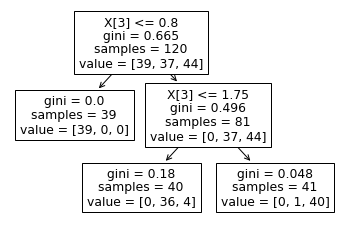

In [13]:
from sklearn import tree
clf_tree =DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=0) 
tree.plot_tree(clf_tree.fit(X_train, y_train)) 

In [14]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

C:\Users\User\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


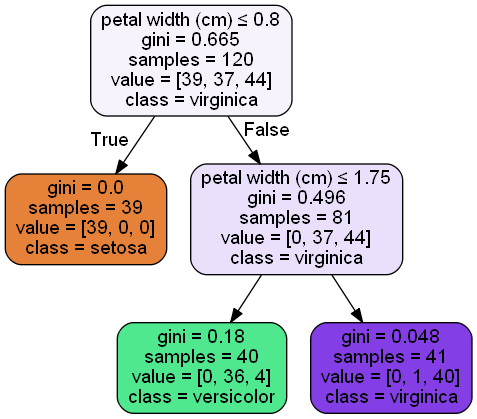

In [15]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, special_characters - 
tree.export_graphviz(clf_tree, feature_names=col_names, out_file = dot_file, class_names=iris.target_names , \
                     filled =True, rounded=True, special_characters=True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

# class0: setosa, class1: versicolor, class2: virginica
Image(graph.create_png())

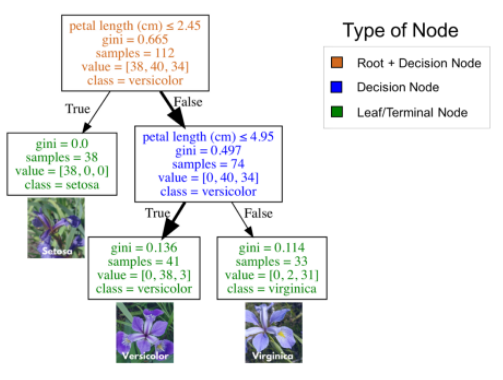

In [16]:
Image("img/iris_example.png",  width=500, height=500)

[0.66486111 0.         0.49626581 0.18       0.04759072]


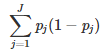

In [19]:
# Gini index #
print(clf_tree.tree_.impurity)

# p는 집합에서 class j를 지닌 요소를 선택할 확률 or 집합 내 클래스 j를 가지는 요소의 비율 #
Image("img/gini.png",  width=200, height=200)

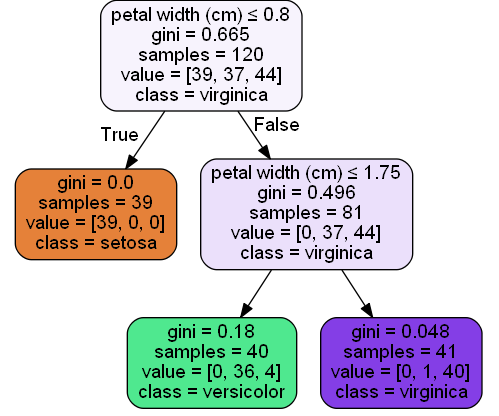

In [17]:
# gini index 구하기 #
# root node 기준 #
class0 = (len(y_train[y_train == 0] == True)) / len(y_train)
class1 = (len(y_train[y_train == 1] == True)) / len(y_train)
class2 = (len(y_train[y_train == 2] == True)) / len(y_train)

root_gini = (class0*(1-class0)) + (class1*(1-class1)) + (class2*(1-class2))
root_gini = np.round(root_gini,3)
root_gini

0.665

In [20]:
# gini index 구하기 #
# Depth = 1 기준 #

left_node_0 = np.sum(y_train[(X_train['petal_w'] <= 0.8)] == 0) / len(y_train[(X_train['petal_w'] <= 0.8)])
left_node_1 = np.sum(y_train[(X_train['petal_w'] <= 0.8)] == 1) / len(y_train[(X_train['petal_w'] <= 0.8)])
left_node_2 = np.sum(y_train[(X_train['petal_w'] <= 0.8)] == 2) / len(y_train[(X_train['petal_w'] <= 0.8)])

right_node_0 = np.sum(y_train[(X_train['petal_w'] > 0.8)] == 0) / len(y_train[(X_train['petal_w'] > 0.8)])
right_node_1 = np.sum(y_train[(X_train['petal_w'] > 0.8)] == 1) / len(y_train[(X_train['petal_w'] > 0.8)])
right_node_2 = np.sum(y_train[(X_train['petal_w'] > 0.8)] == 2) / len(y_train[(X_train['petal_w'] > 0.8)])

left_gini = left_node_0*(1-left_node_0) + left_node_1*(1-left_node_1) + left_node_2*(1-left_node_2)
right_gini = right_node_0*(1-right_node_0) + right_node_1*(1-right_node_1) + right_node_2*(1-right_node_2)

left_gini = np.round(left_gini, 3)
right_gini = np.round(right_gini, 3)

print(left_gini, right_gini)

0.0 0.496


In [21]:
np.sum(y_train[(X_train['petal_w'] <= 0.8)] == 0) / len(y_train[(X_train['petal_w'] <= 0.8)])

1.0

### 1-4. Data Factorize
> 모델에 데이터를 적용시키기 위해 문자로 된 범주형 데이터를 수치데이터 형태로 변경하여 분석

### car data information

In [22]:
car_data = pd.read_csv('./data/car.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'],)
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


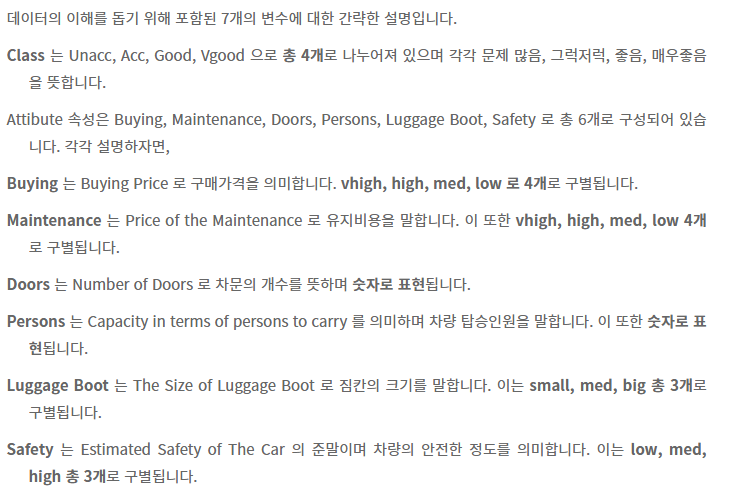

In [23]:
Image("img/car.png",  width=500, height=500)

In [24]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [25]:
# string을 float로 변환할 수 없음! #
XX = car_data.iloc[:,:-1]
yy = car_data.iloc[:,-1]

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtree.fit(XX, yy)

ValueError: could not convert string to float: 'vhigh'

In [26]:
# 변경 전 #
np.unique(car_data['class'])

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [27]:
# 변경 후 #
car_data['class'],class_names = pd.factorize(car_data['class'])
np.unique(car_data['class'])

array([0, 1, 2, 3], dtype=int64)

In [28]:
# class 변경 전, 후 #
print(class_names)
print(car_data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [29]:
car_data['buying'],_ = pd.factorize(car_data['buying'])
car_data['maint'],_ = pd.factorize(car_data['maint'])
car_data['doors'],_ = pd.factorize(car_data['doors'])
car_data['persons'],_ = pd.factorize(car_data['persons'])
car_data['lug_boot'],_ = pd.factorize(car_data['lug_boot'])
car_data['safety'],_ = pd.factorize(car_data['safety'])
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [30]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [31]:
X_ = car_data.iloc[:,:-1]
y_ = car_data.iloc[:,-1]
feature_names = X_.columns

In [32]:
# train, test = 7:3, random split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=0)

In [33]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtree.fit(X_train_, y_train_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test_)
# how did our model perform?
count_misclassified = (y_test_ != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = dtree.score(X_test_, y_test_)
print('Test_Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 81
Test_Accuracy: 0.84


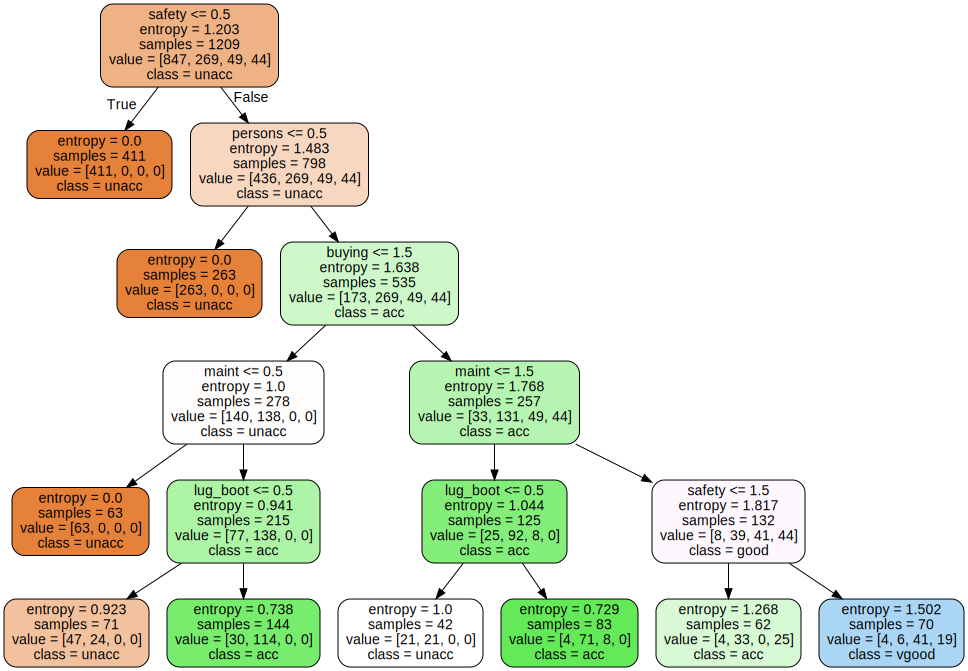

In [35]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)

graph = graphviz.Source(dot_data)  
graph